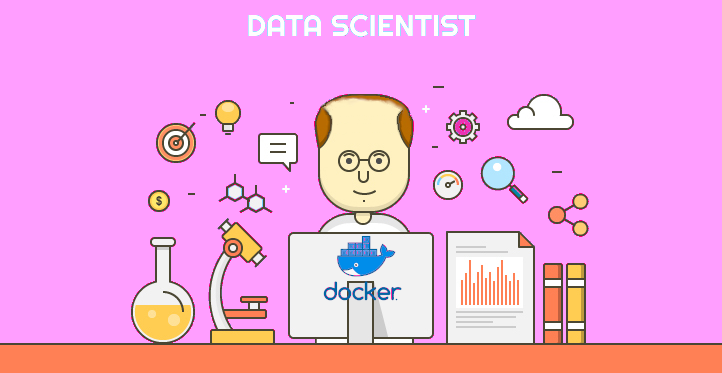

# Curva ROC e Valor AUC

ROC (Receiver Operating Characteristic) é uma curva de probabilidade. É criada ao traçar a taxa verdadeiro-positivo contra a taxa de falsos-positivos. Ou seja, numero de vezes que o classificador acertou a predição contra o número de vezes que o classificador errou a predição.

O AUC representa a área do ROC, considerado como o grau ou medida de separabilidade. Quanto maior seu valor, melhor é o modelo em prever ou (por exemplo) em distinguir entre pacientes com e sem uma determinada doença.

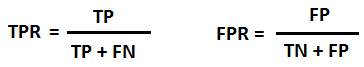

In [1]:
import numpy as np
from sklearn import metrics                           # Metricas para calcular accuracy score
from sklearn.model_selection import train_test_split  # Separa dados de treinamento e teste
from sklearn.datasets import load_breast_cancer       # Carrega o dataset Breast Cancer    
import matplotlib.pyplot as plt                       # Plotagem de gráficos
from sklearn.model_selection import cross_val_score   # Obter uma média de Scores
from sklearn.datasets import make_classification      # Dados arbitrários

from sklearn.linear_model import LogisticRegression   # Modelos utilizados
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

%matplotlib inline

## Exemplo simples

In [16]:
# Gerar os dados
X, y = make_classification(n_samples = 1000, n_features=10, n_classes = 2, flip_y = 0.5)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2)

In [17]:
# Usar um modelo qualquer
model = LogisticRegression(solver='liblinear', penalty='l2', C=0.1)
model.fit(X_train, y_train)
print('Acurácia', model.score(X_test, y_test))

Acurácia 0.69


In [18]:
# Cálculo da curva ROC e da AUC:
y_prob = model.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_prob)
auroc = float(format(metrics.roc_auc_score(y_test, y_prob), '.8f'))
print(auroc)

0.72267227


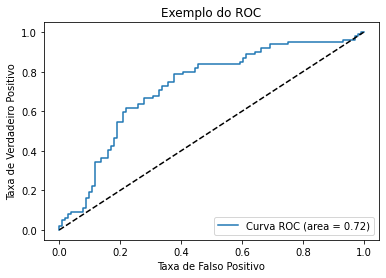

In [19]:
# Plotar os Dados
plt.plot(fpr, tpr, label='Curva ROC (area = %0.2f)' % auroc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('Taxa de Falso Positivo')
plt.ylabel('Taxa de Verdadeiro Positivo')
plt.title('Exemplo do ROC')
plt.legend(loc="lower right")
plt.show()

O ROC possui dois parâmetros:

* Taxa de verdadeiro positivo (True Positive Rate), que é dado por true positives / (true positives + false negatives). Essa taxa também é conhecida como sensibilidade, recordação ou probabilidade de detecção (sensitivity, recall ou probability of detection)
* Taxa de falso positivo (False Positive Rate), que é dado por false positives / (false positives + true negatives). A taxa de falsos positivos também é conhecida como probabilidade de alarme falso ( fall-out or probability of false alarm) e pode ser calculada como (1 — Specificity). A Specificity (especificidade) também é conhecida como true negative rate. Por exemplo, quantas pessoas sem uma doença (true negative) foi classificadas como sadias.

AUC resume a curva ROC num único valor que é o calculo da “área sob a curva”.

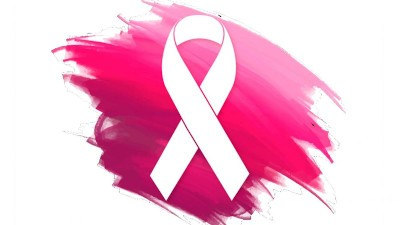

## Estudo sobre o Câncer de Mama

Agora vamos tratar de dados mais sérios, a Scikit-Learn nos oferece uma base sobre o estudo em pacientes com classificações de tipos de Câncer de Mama entre malígno e benígno.

In [30]:
# Carregar a Base
cancer = load_breast_cancer()

# Separar os Dados
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size = .3)
print(len(X_train), len(X_test))

398 171


## Retornar a Acurácia dos Modelos

In [21]:
def score(mdl, Xtrn, Xtst, ytrn, ytst):
    mdl.fit(Xtrn, ytrn)
    return float(format(mdl.score(Xtst, ytst), '.8f'))

In [22]:
def auroc(ytst, yprob):
    fpr, tpr, _ = metrics.roc_curve(ytst, yprob)
    auc = float(format(metrics.roc_auc_score(ytst, yprob), '.8f'))
    return fpr, tpr, auc

## Regressão Logística

In [31]:
clfLR = LogisticRegression(solver='liblinear', penalty='l2', C=0.1)
print("Acurácia", score(clfLR, X_train, X_test, y_train, y_test))

Acurácia 0.94736842


In [32]:
y_probLR = clfLR.predict_proba(X_test)[::,1]
fprLR, tprLR, aucLR = auroc(y_test,  y_probLR)
print("AUC", aucLR)

AUC 0.99321789


## Árvore de Decisão

In [33]:
clfDT = DecisionTreeClassifier()
print("Acurácia", score(clfDT, X_train, X_test, y_train, y_test))

Acurácia 0.94736842


In [34]:
y_probDT = clfDT.predict_proba(X_test)[::,1]
fprDT, tprDT, aucDT = auroc(y_test,  y_probDT)
print("AUC", aucDT)

AUC 0.94307359


## Floresta Aleatória

In [35]:
clfRF = RandomForestClassifier(n_estimators=10)
print("Acurácia", score(clfRF, X_train, X_test, y_train, y_test))

Acurácia 0.96491228


In [36]:
y_probRF = clfRF.predict_proba(X_test)[::,1]
fprRF, tprRF, aucRF = auroc(y_test,  y_probRF)
print("AUC", aucRF)

AUC 0.99242424


## Plotar a curva ROC

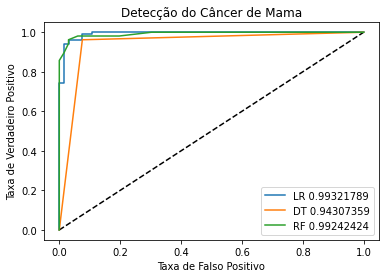

In [37]:
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fprLR,tprLR,label="LR " + str(aucLR))
plt.plot(fprDT,tprDT,label="DT " + str(aucDT))
plt.plot(fprRF,tprRF,label="RF " + str(aucRF))
plt.xlabel('Taxa de Falso Positivo')
plt.ylabel('Taxa de Verdadeiro Positivo')
plt.title('Detecção do Câncer de Mama')
plt.legend(loc="lower right")
plt.show()